# HW1 Breast Cancer
Allison Liu  
2023-09-22

#### Load necessary libraries

In [133]:
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import linear_model

# Data Preparation
#### Load the data to see each column's format, statistic description

In [93]:
# import data
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [94]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
## Explore the data set
n_samples, n_features = cancer.data.shape
#print(cancer.keys())
print ('The dimensions of the data set are', n_samples, 'by', n_features)

#print(cancer.data.shape)
#print(cancer.target.shape)
print('The classes are: ', cancer.target_names)
print('The features in the data set are:', cancer.feature_names)

The dimensions of the data set are 569 by 30
The classes are:  ['malignant' 'benign']
The features in the data set are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Build three predictive models
#### Workflow of building models
1. Split the data into Training, Validation, and Testing data
2. Build a model and adjust hyperparameters
3. Plot the **fitting graph** to see when is underfitting and overfitting
4. Build the model using the best performance of validation data
5. Make a prediction
6. Evaluate performance

# Build a Decision Tree
#### Build a model, hyperparameters adjustment, and fitting graph
I use **max_depth** as the hyperparameter to tune the model, and use validation to evaluate what is the optimal depth of the model.  
Also, I graph the **fitting graph** to see when is underfitting and overfitting. 

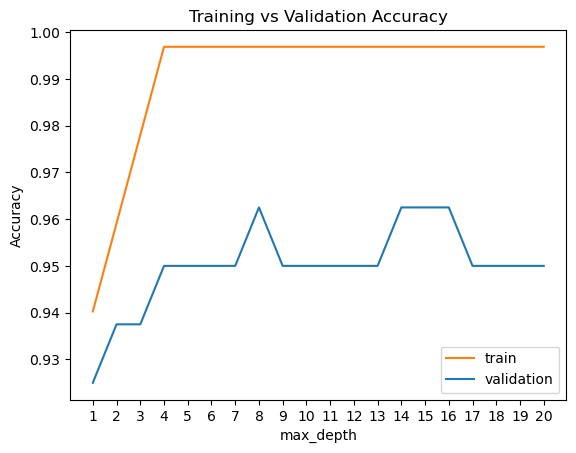

In [79]:
# Optimize decision tree and detect (potential) over-fitting
# I will try maximum depths from 1 to 10
complexity_values = range(1,21)

# I need an empty list to hold my accuracies
train_accuracies = []
val_accuracies=[]

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value, 
                                      min_impurity_decrease=0.001, max_leaf_nodes =10)
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    val_accuracies.append(clf.fit(X_train, y_train).score(X_val, y_val)) 
    
    
# We want to plot our results
line2, =plt.plot(complexity_values, val_accuracies,label='val_accuracies')
line1, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.title("Training vs Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(complexity_values)
plt.legend((line1, line2), ('train', 'validation'))
plt.show()

According to this graph, we can find that **max_depth = 4 is the sweet spot**, because when max_depth increase, accuracy of training and validation data constant. If we increase model's complexity, the chance of overfitting increases.

#### Build the model using max_depth = 4, calculate confusion matrix, and print the performance report.

array([[ 54,   9],
       [  4, 104]], dtype=int64)

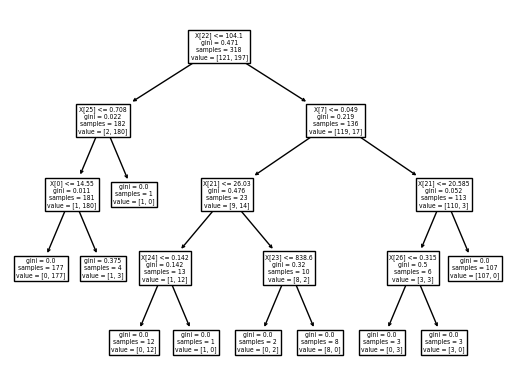

In [63]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4, 
                                      min_impurity_decrease=0.001, max_leaf_nodes =10)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


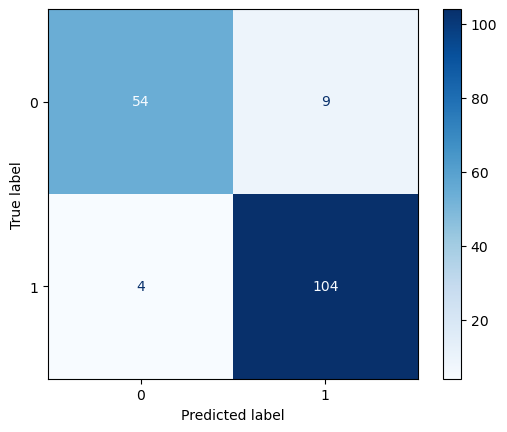

In [64]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        63
           1       0.90      0.96      0.93       108

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



# Build a K-NN model
#### Build a model, hyperparameters adjustment, and fitting graph
First of all, I normalize the data using scaler.  
Second, I use **k= 1 to 20** as the hyperparameter to tune the model, and use validation to evaluate what is the optimal K of the model.  
And then, I graph the **fitting graph** to see when is underfitting and overfitting. 

In [119]:
k_ranges = range(1,21)
train_scores=np.empty(len(k_ranges))
val_scores=np.empty(len(k_ranges))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

for i,k in enumerate(k_ranges):

    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    train_scores[i] = knn.score(X_train_norm, y_train)
    #train_acuracies_k.append(knn.fit(X_train_norm, y_train).score(X_train_norm, y_train))
    val_scores[i] = knn.score(X_val_norm, y_val)
    #val_accuracies_k.append(knn.fit(X_train_norm, y_train).score(X_val_norm, y_val))

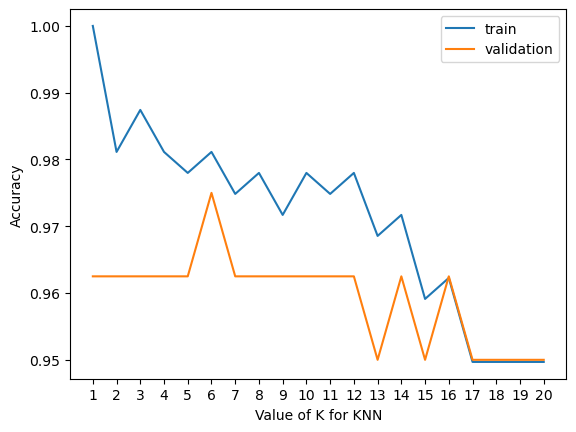

In [120]:
#plot the relationship between K and the testing accuracy
line1, =plt.plot(k_ranges, train_scores,label='train_acuracies_k')
line2, =plt.plot(k_ranges, val_scores,label='val_accuracies_k')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.xticks(k_ranges)
plt.legend((line1, line2), ('train', 'validation'))
plt.show()

According to this graph, we can find that **K = 12 is the sweet spot**, because when K increase, accuracy of validation data decrease. If we increase model's complexity, the chance of overfitting increases.

#### Build the model using K = 12, calculate confusion matrix, and print the performance report.

In [131]:
knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(X_test_norm, y_test)
y_pred = knn.predict(X_test_norm)
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[ 56,   7],
       [  1, 107]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.94      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Reference: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

# Build a Logistic regression model
#### Build a model, hyperparameters adjustment, and fitting graph
I use **C** as the hyperparameter and **different regularization L1, L2** to build and tune the model, and use validation to evaluate what is the optimal C of the model.  
Also, I graph the **fitting graph** to see when is underfitting and overfitting. 

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


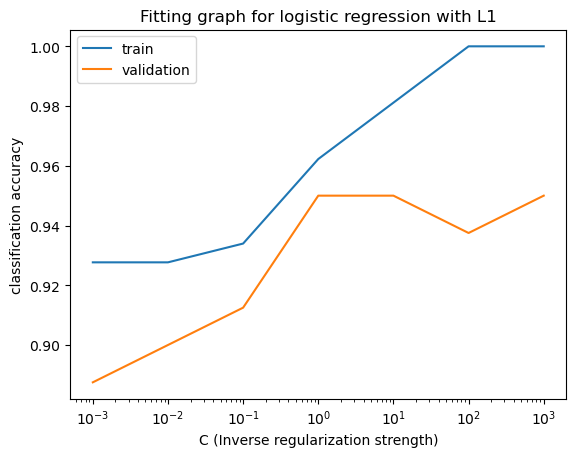

In [127]:
train_accuracies_l1 = []
val_accuracies_l1 = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Set regularization parameter
for C in C_values:
    # we create an instance of the Classifier
    # turn down tolerance for short training time
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    clf_l1_LR = linear_model.LogisticRegression(C=C, penalty='l1', tol=0.0001, solver='liblinear')
    
    # Train the model (fit the data)    
    clf_l1_LR.fit(X_train, y_train)
    
    train_accuracy_l1 = clf_l1_LR.score(X_train, y_train)
    val_accuracy_l1 = clf_l1_LR.score(X_val, y_val)
    
    #Evaluate accuracies
    train_accuracies_l1.append(train_accuracy_l1)
    val_accuracies_l1.append(val_accuracy_l1)

    # Get the coefficients of the models
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()


# Plot results
plt.semilogx(C_values, train_accuracies_l1, C_values, val_accuracies_l1);
plt.title('Fitting graph for logistic regression with L1')
plt.ylabel('classification accuracy')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"))
plt.show()

According to this graph - L1 regularization, we can find that **C = 1 is the sweet spot**, because when C increase, acuracy of validation data decrease. If we increase flexibility of model, the chance of overfitting increases.

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

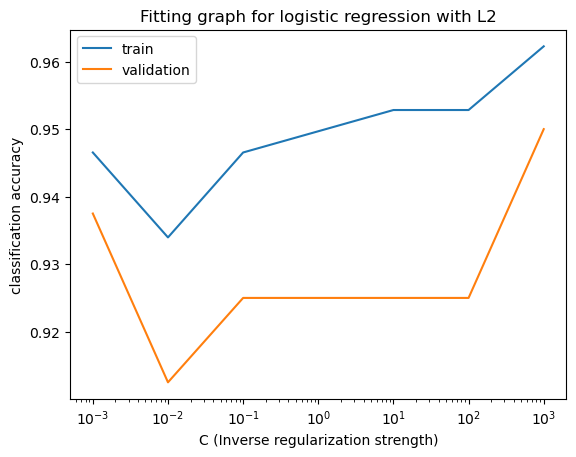

In [128]:
train_accuracies_l2 = []
val_accuracies_l2 = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Set regularization parameter
for C in C_values:
    # we create an instance of the Classifier
    # turn down tolerance for short training time
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    clf_l2_LR = linear_model.LogisticRegression(C=C, penalty='l2', tol=0.0001)
    
    # Train the model (fit the data)    
    clf_l2_LR.fit(X_train, y_train)
    
    train_accuracy_l2 = clf_l2_LR.score(X_train, y_train)
    val_accuracy_l2 = clf_l2_LR.score(X_val, y_val)
    
    #Evaluate accuracies
    train_accuracies_l2.append(train_accuracy_l2)
    val_accuracies_l2.append(val_accuracy_l2)


# Plot results
plt.semilogx(C_values, train_accuracies_l2, C_values, val_accuracies_l2);
plt.title('Fitting graph for logistic regression with L2')
plt.ylabel('classification accuracy')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"))
plt.show()

According to this graph - L2 regularization, we can find that **C = 0.1 is the sweet spot**, because when C increase, acuracy of training and validation data constant. If we increase flexibility of model, the chance of overfitting increases.

#### Build the model using best C, calculate confusion matrix, and print the performance report.
Finally, I use the best C based on accuracy of validation data and different regularization to build models, and print the performance report.

In [130]:
clf_l1_LR = linear_model.LogisticRegression(C=1, penalty='l1', tol=0.0001, solver='liblinear')
clf_l1_LR.fit(X_train, y_train)
y_pred_l1 = clf_l1_LR.predict(X_test)
cf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
print(classification_report(y_test, y_pred_l1))

clf_l2_LR = linear_model.LogisticRegression(C=0.1, penalty='l2', tol=0.0001)
clf_l2_LR.fit(X_train, y_train)
y_pred_l2 = clf_l1_LR.predict(X_test)
cf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
print(classification_report(y_test, y_pred_l2))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


According to this classification report, I found that **models' performance in different regularization - L1 and L2 are not different with each other**.

Reference: https://goodboychan.github.io/python/datacamp/machine_learning/2020/07/06/01-Logistic-regression.html

# Results
I use **f-measure** to compare different models, because f-measure combines the precision and recall score.  
Besides f-measure, I use precision and recall sequently to evaluate models, because precision can give me information to capture actual Malignant/Benign among predictions of all Malignant/Benign.  
According to different performance of different models, I think that **KNN is the best model**. 